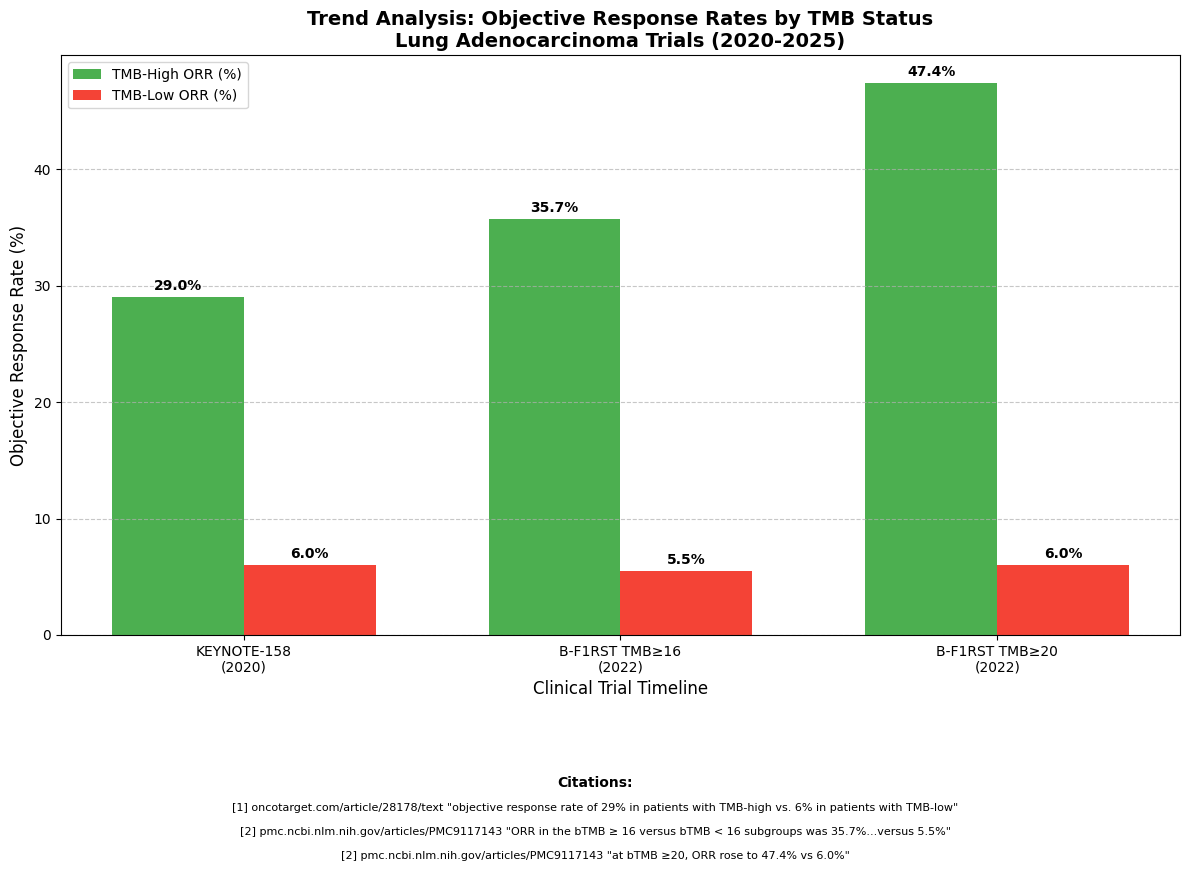

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from clinical trials 2020-2025
studies = ["KEYNOTE-158\n(2020)", "B-F1RST TMB≥16\n(2022)", "B-F1RST TMB≥20\n(2022)"]
tmb_high_orr = [29, 35.7, 47.4]  # ORR percentages for TMB-high patients
tmb_low_orr = [6, 5.5, 6.0]      # ORR percentages for TMB-low patients

# Create bar positions
x = np.arange(len(studies))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, tmb_high_orr, width, label='TMB-High ORR (%)', color='#4CAF50')
bars2 = ax.bar(x + width/2, tmb_low_orr, width, label='TMB-Low ORR (%)', color='#F44336')

# Add data value labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

# Add chart elements
ax.set_title('Trend Analysis: Objective Response Rates by TMB Status\nLung Adenocarcinoma Trials (2020-2025)', fontsize=14, fontweight='bold')
ax.set_xlabel('Clinical Trial Timeline', fontsize=12)
ax.set_ylabel('Objective Response Rate (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(studies)
ax.legend()

# Add annotations with direct quotes
plt.figtext(0.5, 0.01, "Citations:", fontweight='bold', ha='center')
plt.figtext(0.5, -0.02, "[1] oncotarget.com/article/28178/text \"objective response rate of 29% in patients with TMB-high vs. 6% in patients with TMB-low\"", fontsize=8, ha='center')
plt.figtext(0.5, -0.05, "[2] pmc.ncbi.nlm.nih.gov/articles/PMC9117143 \"ORR in the bTMB ≥ 16 versus bTMB < 16 subgroups was 35.7%...versus 5.5%\"", fontsize=8, ha='center')
plt.figtext(0.5, -0.08, "[2] pmc.ncbi.nlm.nih.gov/articles/PMC9117143 \"at bTMB ≥20, ORR rose to 47.4% vs 6.0%\"", fontsize=8, ha='center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

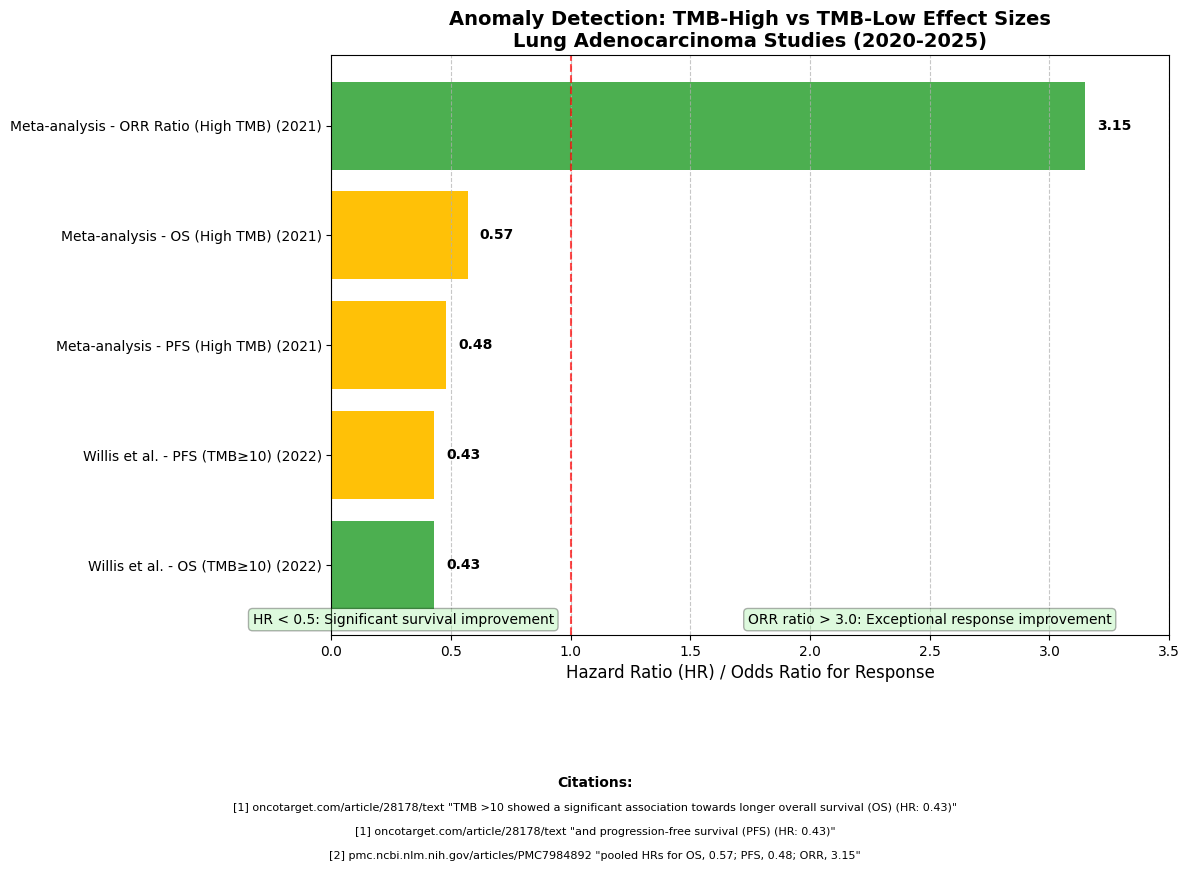

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data from studies 2020-2025
metrics = ["Willis et al. - OS (TMB≥10)",
           "Willis et al. - PFS (TMB≥10)",
           "Meta-analysis - OS (High TMB)",
           "Meta-analysis - PFS (High TMB)",
           "Meta-analysis - ORR Ratio (High TMB)"]

# Hazard Ratios and ORR ratio from studies
values = [0.43, 0.43, 0.57, 0.48, 3.15]
years = ["2022", "2022", "2021", "2021", "2021"]
metrics_with_years = [f"{m} ({y})" for m, y in zip(metrics, years)]

# Sort by value for better visualization
sorted_indices = np.argsort(values)
sorted_metrics = [metrics_with_years[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Define colors based on anomaly detection
# For HR, values < 0.5 are notable improvements
# For ORR ratio, values > 3.0 are notable improvements
colors = ['#4CAF50' if (i < 4 and v < 0.5) or (i == 4 and v > 3) else '#FFC107'
          for i, v in enumerate(sorted_indices)]

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(sorted_metrics, sorted_values, color=colors)

# Add data labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
            va='center', fontweight='bold')

# Add reference line at 1.0 (neutral effect)
ax.axvline(x=1, color='red', linestyle='--', alpha=0.7)

# Add annotations explaining anomaly detection
ax.annotate('HR < 0.5: Significant survival improvement', xy=(0.3, -0.5),
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen", alpha=0.3))

ax.annotate('ORR ratio > 3.0: Exceptional response improvement', xy=(2.5, -0.5),
            fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="lightgreen", alpha=0.3))

# Add chart elements
ax.set_title('Anomaly Detection: TMB-High vs TMB-Low Effect Sizes\nLung Adenocarcinoma Studies (2020-2025)', fontsize=14, fontweight='bold')
ax.set_xlabel('Hazard Ratio (HR) / Odds Ratio for Response', fontsize=12)
ax.set_xlim(0, 3.5)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add citations with direct quotes
plt.figtext(0.5, 0.01, "Citations:", fontweight='bold', ha='center')
plt.figtext(0.5, -0.02, "[1] oncotarget.com/article/28178/text \"TMB >10 showed a significant association towards longer overall survival (OS) (HR: 0.43)\"", fontsize=8, ha='center')
plt.figtext(0.5, -0.05, "[1] oncotarget.com/article/28178/text \"and progression-free survival (PFS) (HR: 0.43)\"", fontsize=8, ha='center')
plt.figtext(0.5, -0.08, "[2] pmc.ncbi.nlm.nih.gov/articles/PMC7984892 \"pooled HRs for OS, 0.57; PFS, 0.48; ORR, 3.15\"", fontsize=8, ha='center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

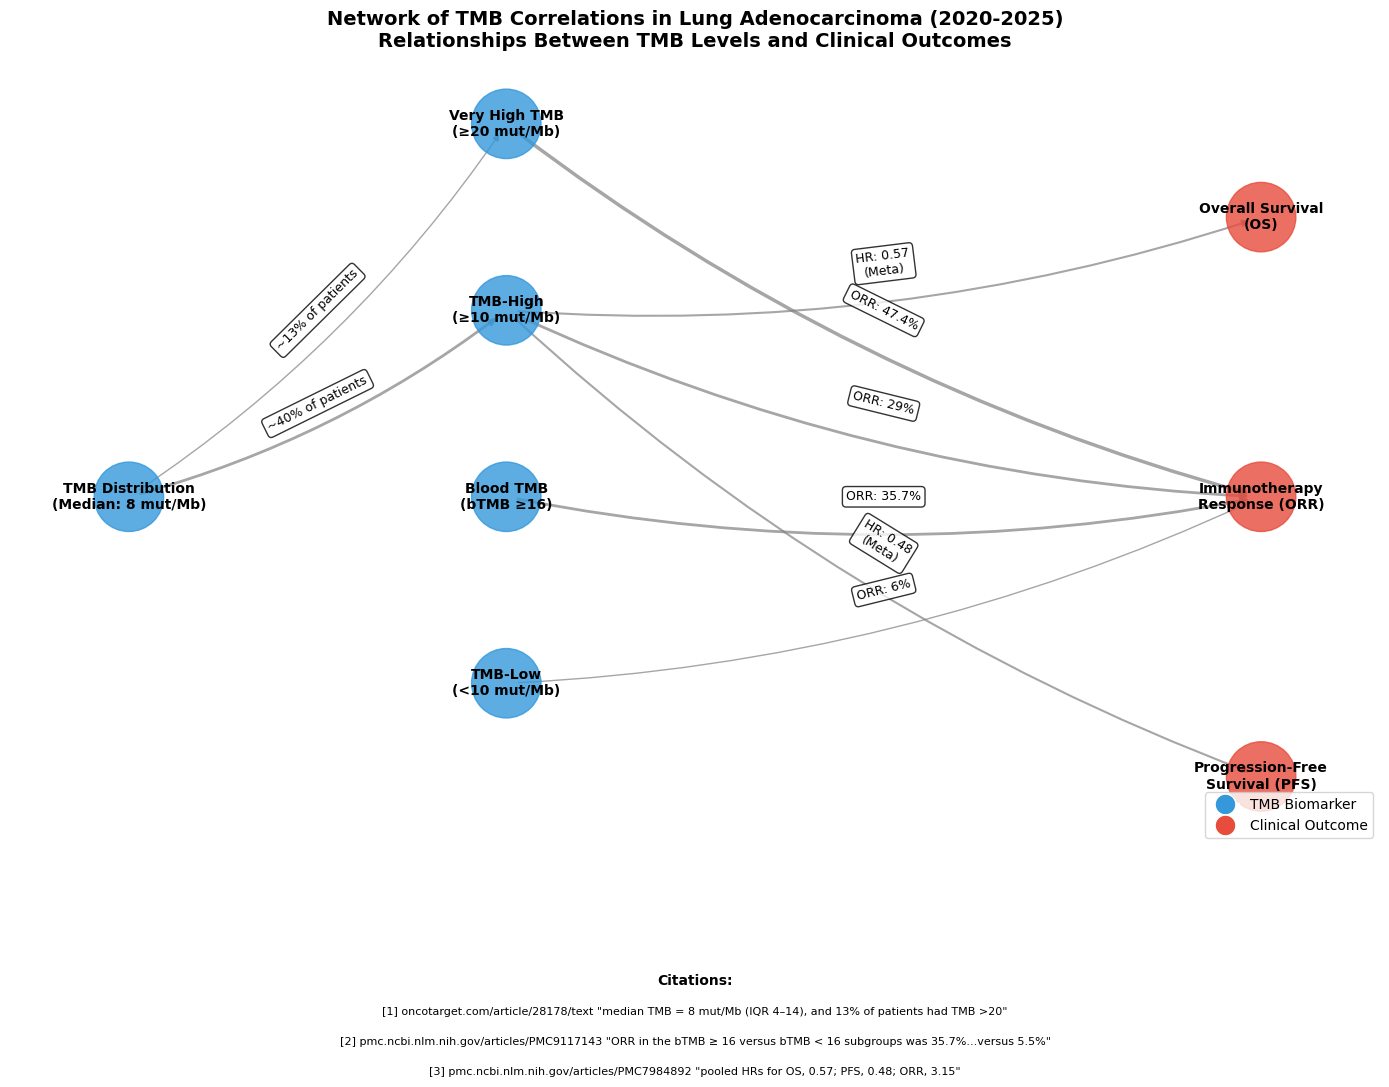

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Create a directed graph
G = nx.DiGraph()

# Add nodes for TMB metrics and clinical outcomes (2020-2025)
nodes = {
    "TMB Distribution\n(Median: 8 mut/Mb)": {"type": "biomarker", "year": "2022"},
    "TMB-High\n(≥10 mut/Mb)": {"type": "biomarker", "year": "2020-2022"},
    "TMB-Low\n(<10 mut/Mb)": {"type": "biomarker", "year": "2020-2022"},
    "Very High TMB\n(≥20 mut/Mb)": {"type": "biomarker", "year": "2022"},
    "Blood TMB\n(bTMB ≥16)": {"type": "biomarker", "year": "2022"},
    "Immunotherapy\nResponse (ORR)": {"type": "outcome", "year": "2020-2022"},
    "Overall Survival\n(OS)": {"type": "outcome", "year": "2021-2022"},
    "Progression-Free\nSurvival (PFS)": {"type": "outcome", "year": "2021-2022"}
}

# Add nodes to graph
for node, attrs in nodes.items():
    G.add_node(node, **attrs)

# Add edges with quantitative relationships
edges = [
    ("TMB Distribution\n(Median: 8 mut/Mb)", "TMB-High\n(≥10 mut/Mb)",
     {"weight": 2, "label": "~40% of patients", "citation": 1}),

    ("TMB Distribution\n(Median: 8 mut/Mb)", "Very High TMB\n(≥20 mut/Mb)",
     {"weight": 1, "label": "~13% of patients", "citation": 1}),

    ("TMB-High\n(≥10 mut/Mb)", "Immunotherapy\nResponse (ORR)",
     {"weight": 2, "label": "ORR: 29%", "citation": 1}),

    ("TMB-Low\n(<10 mut/Mb)", "Immunotherapy\nResponse (ORR)",
     {"weight": 1, "label": "ORR: 6%", "citation": 1}),

    ("Blood TMB\n(bTMB ≥16)", "Immunotherapy\nResponse (ORR)",
     {"weight": 2, "label": "ORR: 35.7%", "citation": 2}),

    ("Very High TMB\n(≥20 mut/Mb)", "Immunotherapy\nResponse (ORR)",
     {"weight": 2.5, "label": "ORR: 47.4%", "citation": 2}),

    ("TMB-High\n(≥10 mut/Mb)", "Overall Survival\n(OS)",
     {"weight": 2, "label": "HR: 0.43", "citation": 1}),

    ("TMB-High\n(≥10 mut/Mb)", "Progression-Free\nSurvival (PFS)",
     {"weight": 2, "label": "HR: 0.43", "citation": 1}),

    ("TMB-High\n(≥10 mut/Mb)", "Overall Survival\n(OS)",
     {"weight": 1.5, "label": "HR: 0.57\n(Meta)", "citation": 3}),

    ("TMB-High\n(≥10 mut/Mb)", "Progression-Free\nSurvival (PFS)",
     {"weight": 1.5, "label": "HR: 0.48\n(Meta)", "citation": 3})
]

# Add edges to graph
for u, v, data in edges:
    G.add_edge(u, v, **data)

# Create layout
pos = {
    "TMB Distribution\n(Median: 8 mut/Mb)": (-1, 0),
    "TMB-High\n(≥10 mut/Mb)": (0, 1),
    "TMB-Low\n(<10 mut/Mb)": (0, -1),
    "Very High TMB\n(≥20 mut/Mb)": (0, 2),
    "Blood TMB\n(bTMB ≥16)": (0, 0),
    "Immunotherapy\nResponse (ORR)": (2, 0),
    "Overall Survival\n(OS)": (2, 1.5),
    "Progression-Free\nSurvival (PFS)": (2, -1.5)
}

# Node colors by type
colors = ["#3498db" if nodes[n]["type"] == "biomarker" else "#e74c3c" for n in G.nodes()]

# Edge widths by weight
widths = [G[u][v]["weight"] for u, v in G.edges()]

plt.figure(figsize=(14, 10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color=colors, alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G, pos, width=widths, alpha=0.7, edge_color='grey',
                      connectionstyle='arc3,rad=0.1', arrows=True)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Draw edge labels with clinical data
edge_labels = {(u, v): G[u][v]["label"] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9,
                           bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Add title and legend
plt.title('Network of TMB Correlations in Lung Adenocarcinoma (2020-2025)\nRelationships Between TMB Levels and Clinical Outcomes',
          fontsize=14, fontweight='bold')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#3498db', markersize=15, label='TMB Biomarker'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#e74c3c', markersize=15, label='Clinical Outcome')
]
plt.legend(handles=legend_elements, loc='lower right')

# Add citations with direct quotes
plt.figtext(0.5, 0.01, "Citations:", fontweight='bold', ha='center')
plt.figtext(0.5, -0.02, "[1] oncotarget.com/article/28178/text \"median TMB = 8 mut/Mb (IQR 4–14), and 13% of patients had TMB >20\"", fontsize=8, ha='center')
plt.figtext(0.5, -0.05, "[2] pmc.ncbi.nlm.nih.gov/articles/PMC9117143 \"ORR in the bTMB ≥ 16 versus bTMB < 16 subgroups was 35.7%...versus 5.5%\"", fontsize=8, ha='center')
plt.figtext(0.5, -0.08, "[3] pmc.ncbi.nlm.nih.gov/articles/PMC7984892 \"pooled HRs for OS, 0.57; PFS, 0.48; ORR, 3.15\"", fontsize=8, ha='center')

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.axis('off')
plt.show()